## Load parameters and calculate quiescent luminosity, assign spectral class and  if not already

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
import specmatchemp.library
import specmatchemp.plots as smplot
import glob
warnings.filterwarnings("ignore")

from f_6_7_8 import merged_spec_class, Mbol_to_Lum, kepler_luminosity, L_quieterr

cluster_dict = {'M67':['M67','M67', 15, 4.0, 850],
                'Ruprecht_147':['Ruprecht 147','Ruprecht_147', 30, 2.5, 300.],
                'M44':['M44','M44', 47, 0.73, 181.5],
                'M45':['M45','M45',55.,0.12,120.],
                'NGC_1647':['NGC 1647','NGC_1647',0.,0.145,550.],
                'Pleiades':['Pleiades','Pleiades',0.,0.100,136.]
               }
DM = lambda x: 5.*np.log10(float(x))-5. 

#------------------------------------------------
cluster = 'Pleiades'
test = 'run_02'
#------------------------------------------------

basics = cluster_dict[cluster]
dm = DM(basics[4])
global dm
l = '/home/ekaterina/Documents/appaloosa/stars_shortlist/{0}/{0}_new_parameter.csv'.format(cluster)
print(glob.glob(l))

# if glob.glob(l) != []:
specs = pd.read_csv(l, index_col='EPIC')
if 'L_quiet_err' not in specs.columns.values:
    wavmin, wavmax = 3480., 9700.
    lib = specmatchemp.library.read_hdf(wavlim=[wavmin,wavmax])
    specs = merged_spec_class(specs)
    specs['L_quiet'] = np.nan
    specs['L_quiet_bol'] = np.nan
    specs['L_quiet_err'] =np.nan


    for oid in specs.index.values:
        specs.L_quiet_bol[oid] = Mbol_to_Lum(specs.Mbol[oid])
        specs.L_quiet[oid] = kepler_luminosity(specs['T'][oid],lib)
        specs.L_quiet_err[oid] = L_quieterr(specs.L_quiet[oid],
                                            specs.R_Rsun[oid],
                                            specs.R_Rsun_err[oid],
                                            specs['T'][oid],
                                            specs['T_err'][oid],
                                            lib)


print(specs.columns)


['/home/ekaterina/Documents/appaloosa/stars_shortlist/Pleiades/Pleiades_new_parameter.csv']
Reading library from /home/ekaterina/.specmatchemp/library.h5
T=  4070.0
T=  4070.0
T=  6240.0
T=  6240.0
T=  5920.0
T=  5920.0
T=  4410.0
T=  4410.0
T=  5040.0
T=  5040.0
T=  4620.0
T=  4620.0
T=  6040.0
T=  6040.0
T=  5170.0
T=  5170.0
T=  3800.0
T=  3800.0
T=  5280.0
T=  5280.0
T=  3500.0
T=  3500.0
T=  4410.0
T=  4410.0
T=  5340.0
T=  5340.0
T=  4830.0
T=  4830.0
T=  5880.0
T=  5880.0
T=  3030.0
T=  3030.0
T=  4410.0
T=  4410.0
T=  5280.0
T=  5280.0
T=  5880.0
T=  5880.0
T=  5040.0
T=  5040.0
T=  5590.0
T=  5590.0
T=  6510.0
T=  6510.0
T=  5660.0
T=  5660.0
T=  4230.0
T=  4230.0
T=  4410.0
T=  4410.0
T=  5590.0
T=  5590.0
T=  4830.0
T=  4830.0
T=  3100.0
T=  3100.0
T=  3410.0
T=  3410.0
T=  4000.0
T=  4000.0
T=  5340.0
T=  5340.0
T=  4070.0
T=  4070.0
T=  4230.0
T=  4230.0
T=  5720.0
T=  5720.0
T=  5280.0
T=  5280.0
T=  3870.0
T=  3870.0
T=  6340.0
T=  6340.0
T=  4620.0
T=  4620.0
T=  4070.0

In [2]:
r = specs.L_quiet_err/specs.L_quiet
r.head()

EPIC
211104755    0.358036
211112392    0.412883
211113061    0.358771
211109428    0.425637
211111655    0.283868
dtype: float64

In [10]:
from f_6_7_8 import interactive_CMD
crs = {'g_i':('gmag','imag'),
       'J_K':('J','K'),
       'r_z':('rmag','zmag'),
       'g_z':('gmag','zmag'),}

# for key, c in crs.items():
#     print(c[0],c[1])
#     interactive_CMD(specs,cid1=c[0],cid2=c[1])
#     input('Plot for {} done?'.format(key))
    


In [ ]:
outs=pd.Series()
import os
from f_6_7_8 import CMD
for i in [1,2,3,4]:
    file = '/home/ekaterina/Documents/appaloosa/stars_shortlist/share/temp/selected-data{}.txt'.format(i)
    if os.stat(file).st_size != 0:
        df = pd.read_csv(file,header=None,sep=' ').T.dropna(how='any')
        df = df.rename(index=str, columns={0:'outlier'})
        df.outlier = df.outlier.astype('int')
        s = df.outlier
        outs = pd.concat([outs,s],ignore_index=True)
outs = outs.drop_duplicates()
print(outs)
for key, c in crs.items():
    CMD(specs,cluster,cid1=c[0],cid2=c[1],color=key,ylim=(19,5),outliers=outs)
outs.to_csv('/home/ekaterina/Documents/appaloosa/stars_shortlist/{0}/{0}_outliers.csv'.format(cluster))

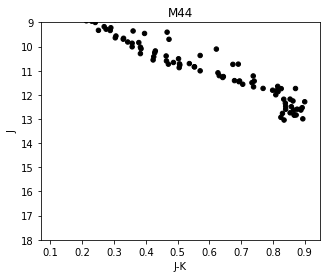

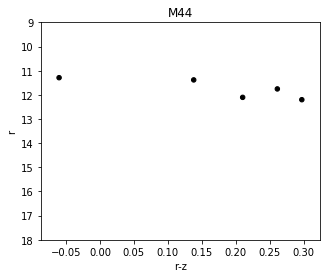

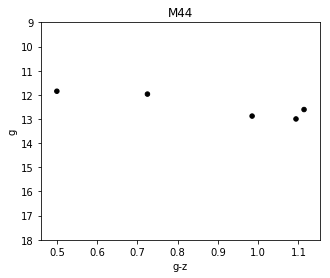

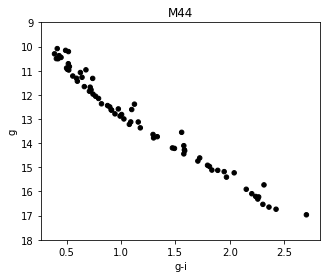

In [16]:
from f_6_7_8 import CMD
for key, c in crs.items():
    CMD(specs,cluster,cid1=c[0],cid2=c[1],color=key,ylim=(18,9))

In [3]:
print(specs.shape)
specs = specs.drop(list(outs))
print(specs.shape)

(155, 60)


NameError: name 'outs' is not defined

In [6]:
specs[specs['T']<3000]

,Unnamed: 0,gmag,rmag,imag,zmag,ymag,J,H,K,RAJ2000,...,L_quiet,L_quiet_bol,r_z,J_K,g_z,g_i,T_err,R_Rsun_err,59.1,L_quiet_err
EPIC,,,,,,,,,,,,,,,,,,,,,


In [ ]:
specs = specs.dropna(how='any',subset=['T','L_quiet'])

In [ ]:
print(specs.shape)

In [ ]:
#intermediate save
specs.to_csv(l)

In [ ]:
from pandas.api.types import CategoricalDtype
from f_6_7_8 import spec_class_hist
categor = ['{}{}'.format(c,num) for c in list('OBAFGKM') for num in list(range(10))]
type_ = CategoricalDtype(categories=categor, ordered=True)
specs.spec_class.astype(type_)
s = specs.sort_values(by='spec_class')
spec_class_hist(s,cluster,type_)

In [ ]:
#remove all objects with spectral class hotter than F4
specs = specs[specs.spec_class > 'F3']
specs.shape
specs.to_csv(l)

In [ ]:
CMD(specs,cluster,cid1='gmag',cid2='imag',color='g_i',ylim=(21,8))#19,5
CMD(specs,cluster,cid1='J',cid2='K',color='J_K',ylim=(18,6))#14,5
CMD(specs,cluster,cid1='rmag',cid2='zmag',color='r_z',ylim=(20,8))#18,5
CMD(specs,cluster,cid1='gmag',cid2='zmag',color='g_z',ylim=(20,9))#18,5